# Example Usage of `pair_solver`

This notebook demonstrates how to use the `pair_solver` code to find the optimal pairing of particles for minimising intra-pair distance.

Let's start with the simple 1D case:

In [1]:
import numpy as np

import pair_solver

np.random.seed(seed=42)
coords_1d = np.random.random((4, 1))
solution_1d, loss_1d = pair_solver.mc_solution(coords_1d)

print(coords_1d)
print(solution_1d)

For a 1D case, the optimal solution is sorting.
Returning the 1D analytical solution.
[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]]
{(1, 2), (0, 3)}


The solution is returned as a `set` of sorted `tuple`s of the particle indices. As expected the two particles with the smallest coordinate values (0 & 3) are paired, and the two particles with the largest coordinate values (1 & 2) are paired with each other. For 1D systems, the solutions are analytically the global optimum via sorting.

Step: 200, acc. ratio: 0.410
Step: 400, acc. ratio: 0.235
Step: 600, acc. ratio: 0.163
Step: 800, acc. ratio: 0.128
Ran for 1000 steps, with acc. ratio: 0.105
Initial loss: 6.93, new_loss: 2.49
Final beta: 100.9


/var/folders/b1/zflg536s6rvg62mcvlc7dnnw0000gn/T/ipykernel_63071/1654189227.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_of_pairs.show()


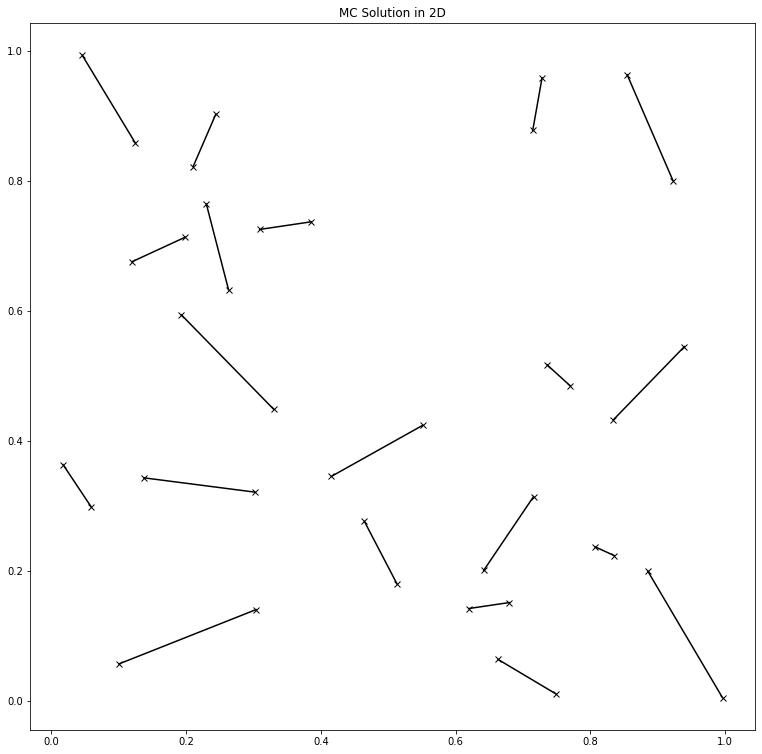

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_solution(coords, sol):
    fig, ax = plt.subplots(1, 1, figsize=(13,13))
    for pair in sol:
        p1, p2 = pair
        xs = coords[[p1,p2],0]
        ys = coords[[p1,p2],1]
        ax.plot(xs,ys, 'x-', color='k')
    ax.set_title(f'MC Solution in {coords.shape[1]}D')
    return fig

coords_2d = np.random.random((40, 2))
solution_2d, loss_2d = pair_solver.mc_solution(coords_2d)

plot_of_pairs = plot_solution(coords_2d, solution_2d)
plot_of_pairs.show()

The implementation scales well with number of particles:

In [3]:
import time

n_particles = 1000
n_dimension = 2
start_time = time.perf_counter()
coords_many_particles = np.random.random((n_particles, n_dimension))
solution_many_particles, loss_many_particles = pair_solver.mc_solution(coords_many_particles)
end_time = time.perf_counter()

print(f'Time taken for {n_particles} particles in {n_dimension} dimensions: {end_time - start_time:.2f}s')


Step: 200, acc. ratio: 0.395
Step: 400, acc. ratio: 0.302
Step: 600, acc. ratio: 0.247
Step: 800, acc. ratio: 0.223
Ran for 1000 steps, with acc. ratio: 0.207
Initial loss: 162.56, new_loss: 126.49
Final beta: 100.9
Time taken for 1000 particles in 2 dimensions: 21.89s


as well as dimension:

In [4]:
n_particles = 1000
n_dimension = 10
start_time = time.perf_counter()
coords_high_dimension = np.random.random((n_particles, n_dimension))
solution_many_dimension, loss_many_dimension = pair_solver.mc_solution(coords_high_dimension)
end_time = time.perf_counter()

print(f'Time taken for {n_particles} particles in {n_dimension} dimensions: {end_time - start_time:.2f}s')

Step: 200, acc. ratio: 0.510
Step: 400, acc. ratio: 0.432
Step: 600, acc. ratio: 0.368
Step: 800, acc. ratio: 0.355
Ran for 1000 steps, with acc. ratio: 0.33
Initial loss: 595.59, new_loss: 533.89
Final beta: 100.9
Time taken for 1000 particles in 10 dimensions: 18.82s


The max number of particles that can be run in 30s if we fix budget = $100\times n_{particles}$ is 400-500

In [18]:
n_particles = 450
budget_for_convergence = 100 * n_particles
n_dimension = 3
start_time = time.perf_counter()
coords_high_dimension = np.random.random((n_particles, n_dimension))
solution_many_dimension, loss_many_dimension = pair_solver.mc_solution(coords_high_dimension, budget=budget_for_convergence)
end_time = time.perf_counter()

print(f'Time taken for {n_particles} particles in {n_dimension} dimensions: {end_time - start_time:.2f}s')

Step: 9000, acc. ratio: 0.062
Step: 18000, acc. ratio: 0.038
Step: 27000, acc. ratio: 0.028
Step: 36000, acc. ratio: 0.022
Ran for 45000 steps, with acc. ratio: 0.0188
Initial loss: 116.71, new_loss: 28.75
Final beta: 100.9
Time taken for 450 particles in 3 dimensions: 48.07s
